<a href="https://colab.research.google.com/github/monicasjsu/deep_learning/blob/master/keras_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the required libraries

In [29]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

# # Use seaborn for pairplot
# !pip install seaborn

# Use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


2.2.0-rc3
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-hgnhx2e2
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-hgnhx2e2
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=82437 sha256=51003f07df3ca80ea069c93c33dd2b4287e814cd03e9d0934ca0e779a7541a17
  Stored in directory: /tmp/pip-ephem-wheel-cache-mazh7xni/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
2.2.0-rc3
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-s02v9sxs
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-s02v9sxs
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=82437 sha256=fd9c01ad66983f0cf4af6d71d17fb7db31c640fd6b3b6677d56cb7e52639ac9c
  Stored in directory: /tmp/pip-ephem-wheel-cache-6w9uq1i1/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully bu

Load the dataset(Auto MPG Dataset)

In [30]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [0]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()

In [32]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


Checking if the dataset contains any null values

In [33]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

As there are less number of rows, we can drop them

In [0]:
dataset = dataset.dropna()

Performing one-hot encoding on 'origin' column 

In [0]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [36]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


Split the dataset into train and test

In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

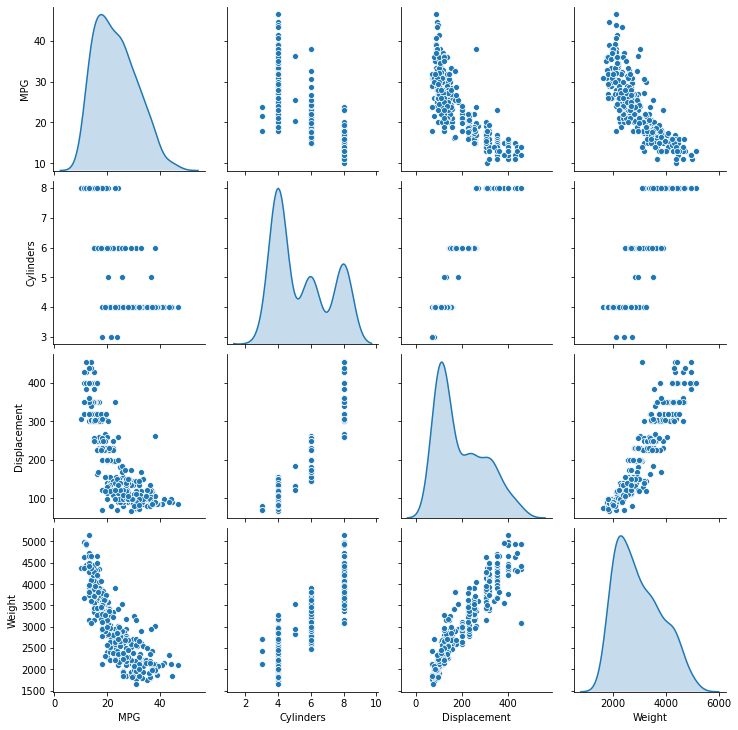

In [38]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

Overall statistics of the train dataset

In [39]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [0]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

Normalize the data

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

Build the model using keras Sequential API

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [45]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 4.0778357e-01],
       [-1.1762650e-04],
       [ 3.7990445e-01],
       [-4.7542743e-02],
       [-1.4362672e-01],
       [ 2.8400436e-02],
       [-1.3227418e-01],
       [-2.7543485e-01],
       [ 1.3329256e-01],
       [-1.8636137e-01]], dtype=float32)

Train the model for 1000 epochs, and record the training and validation accuracy in the `history` object.

In [46]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:562.2328,  mae:22.3883,  mse:563.0746,  val_loss:546.9293,  val_mae:21.9991,  val_mse:547.2540,  
....................................................................................................
Epoch: 100, loss:6.0252,  mae:1.7064,  mse:6.0959,  val_loss:7.8441,  val_mae:2.1533,  val_mse:7.8338,  
....................................................................................................
Epoch: 200, loss:5.2430,  mae:1.6108,  mse:5.2648,  val_loss:7.9202,  val_mae:2.1717,  val_mse:7.9039,  
....................................................................................................
Epoch: 300, loss:4.7881,  mae:1.4446,  mse:4.7964,  val_loss:8.1779,  val_mae:2.1714,  val_mse:8.1574,  
....................................................................................................
Epoch: 400, loss:4.6521,  mae:1.4403,  mse:4.6634,  val_loss:8.5054,  val_mae:2.2357,  val_mse:8.4780,  
..............................................................

In [47]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.805326,1.031678,2.840306,10.570681,2.518448,10.529321,995
996,2.942112,1.062550,2.956905,11.017384,2.580138,10.969019,996
997,2.911296,1.079838,2.911878,11.126963,2.589423,11.077327,997
998,3.115737,1.118782,3.142975,10.944061,2.555167,10.897551,998
999,2.650158,1.002383,2.671541,11.155023,2.590782,11.107538,999


In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

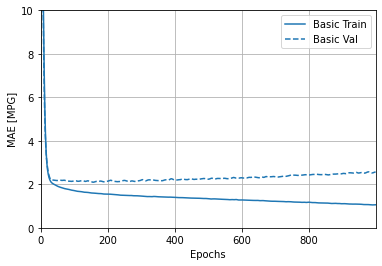

In [49]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

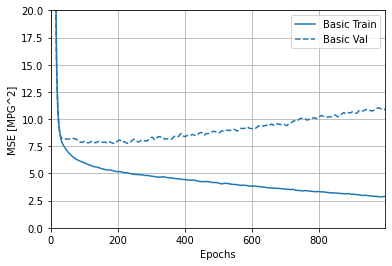

In [50]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

Trying to use early stopping and again building the model to avoid overfitting

In [51]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:571.6109,  mae:22.6166,  mse:571.4291,  val_loss:566.3745,  val_mae:22.4604,  val_mse:566.6593,  
....................................................

Text(0, 0.5, 'MAE [MPG]')

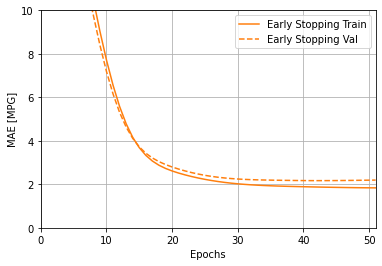

In [52]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [53]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 5.3293 - mae: 1.7169 - mse: 5.3737
Testing set Mean Abs Error:  1.72 MPG


Predict MPG values using test dataset

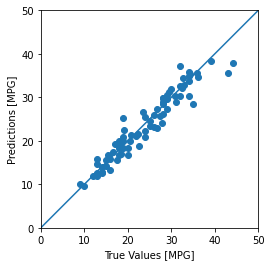

In [54]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Visualize the error distribution using histogram

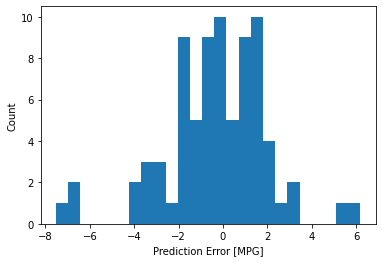

In [55]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")